In [36]:
class Node:
    def __init__(self, prob, symbol, left=None, right=None):
        # probability of symbol
        self.prob = prob

        # symbol 
        self.symbol = symbol

        # left node
        self.left = left

        # right node
        self.right = right

        # tree direction (0/1)
        self.code = ''

""" A helper function to print the codes of symbols by traveling Huffman Tree"""
codes = dict()

def Calculate_Codes(node, val=''):
    # huffman code for current node
    newVal = val + str(node.code)

    if(node.left):
        Calculate_Codes(node.left, newVal)
    if(node.right):
        Calculate_Codes(node.right, newVal)

    if(not node.left and not node.right):
        codes[node.symbol] = newVal
         
    return codes        

""" A helper function to calculate the probabilities of symbols in given data"""
def Calculate_Probability(data):
    symbols = dict()
    for element in data:
        if symbols.get(element) == None:
            symbols[element] = 1
        else: 
            symbols[element] += 1     
    return symbols

""" A helper function to obtain the encoded output"""
def Output_Encoded(data, coding):
    encoding_output = []
    for c in data:
      #  print(coding[c], end = '')
        encoding_output.append(coding[c])
        
    string = ''.join([str(item) for item in encoding_output])    
    return string
        
""" A helper function to calculate the space difference between compressed and non compressed data"""    
def Total_Gain(data, coding):
    before_compression = len(data) * 8 # total bit space to stor the data before compression
    after_compression = 0
    symbols = coding.keys()
    for symbol in symbols:
        count = data.count(symbol)
        after_compression += count * len(coding[symbol]) #calculate how many bit is required for that symbol in total
    print("Space usage before compression (in bits):", before_compression)    
    print("Space usage after compression (in bits):",  after_compression)           

def Huffman_Encoding(data):
    symbol_with_probs = Calculate_Probability(data)
    symbols = symbol_with_probs.keys()
    probabilities = symbol_with_probs.values()
    print("symbols: ", symbols)
    print("probabilities: ", probabilities)
    
    nodes = []
    
    # converting symbols and probabilities into huffman tree nodes
    for symbol in symbols:
        nodes.append(Node(symbol_with_probs.get(symbol), symbol))
    
    while len(nodes) > 1:
        # sort all the nodes in ascending order based on their probability
        nodes = sorted(nodes, key=lambda x: x.prob)
        # for node in nodes:  
        #      print(node.symbol, node.prob)
    
        # pick 2 smallest nodes
        right = nodes[0]
        left = nodes[1]
    
        left.code = 0
        right.code = 1
    
        # combine the 2 smallest nodes to create new node
        newNode = Node(left.prob+right.prob, left.symbol+right.symbol, left, right)
    
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(newNode)
            
    huffman_encoding = Calculate_Codes(nodes[0])
    print("symbols with codes", huffman_encoding)
    Total_Gain(data, huffman_encoding)
    encoded_output = Output_Encoded(data,huffman_encoding)
    return encoded_output, nodes[0]  
    
 
def Huffman_Decoding(encoded_data, huffman_tree):
    tree_head = huffman_tree
    decoded_output = []
    for x in encoded_data:
        if x == '1':
            huffman_tree = huffman_tree.right   
        elif x == '0':
            huffman_tree = huffman_tree.left
        try:
            if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                pass
        except AttributeError:
            decoded_output.append(huffman_tree.symbol)
            huffman_tree = tree_head
        
    string = ''.join([str(item) for item in decoded_output])
    return string        
    


In [39]:
from collections import OrderedDict
print ("\n\n.............CODIFICANDO............\n\n")
msn = "¡Proyecto Numero 2, Principios de Comunicaciones Otoño 2022 EL4112! Modulación digital M-FSK."


#msn="holo  aa"

encoding, tree=Huffman_Encoding(msn)





.............CODIFICANDO............


symbols:  dict_keys(['¡', 'P', 'r', 'o', 'y', 'e', 'c', 't', ' ', 'N', 'u', 'm', '2', ',', 'i', 'n', 'p', 's', 'd', 'C', 'a', 'O', 'ñ', '0', 'E', 'L', '4', '1', '!', 'M', 'l', 'ó', 'g', '-', 'F', 'S', 'K', '.'])
probabilities:  dict_values([1, 2, 3, 9, 1, 4, 5, 3, 11, 1, 3, 2, 5, 1, 8, 4, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1])
symbols with codes {'ñ': '0000000', 'O': '0000001', 'C': '0000010', 'p': '0000011', ',': '0000100', 'N': '0000101', 'y': '0000110', '¡': '0000111', 'l': '000100', 'M': '000101', '1': '000110', 's': '000111', 'm': '001000', 'P': '001001', 'n': '00101', 'i': '0011', 'e': '01000', 'a': '01001', 'd': '01010', 'u': '01011', 't': '01100', 'r': '01101', '2': '0111', ' ': '100', 'c': '1010', '.': '101100', 'K': '101101', 'S': '101110', 'F': '101111', 'o': '110', '-': '111000', 'g': '111001', 'ó': '111010', '!': '111011', '4': '111100', 'L': '111101', 'E': '111110', '0': '111111'}
Space usage before comp

[1500. 1500. 1500. ... 1500. 1500. 1500.]


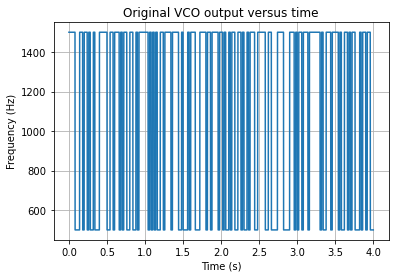

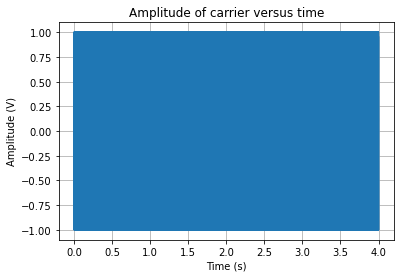

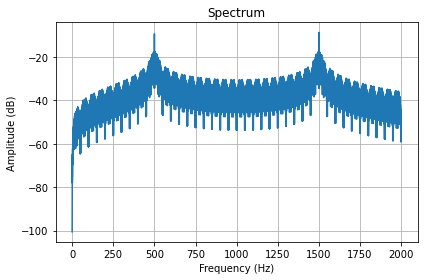

[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 

In [41]:
import numpy as np
import pylab as pl
import scipy.signal.signaltools as sigtool
import scipy.signal as signal

#the following variables setup the system
Fc = 1000       #simulate a carrier frequency of 1kHz
Fbit = 50       # Tasa de bits de datos simulada
Fdev = 500      #frequency deviation, make higher than bitrate (x10)
N = len(encoding)        #how many bits to send
A = 1           #transmitted signal amplitude
Fs = 10000      #sampling frequency for the simulator, must be higher than twice the carrier frequency
A_n = 0.10      #noise peak amplitude
N_prntbits = 200 #number of bits to print in plots    

    
"""
Data in
"""
#generate some random data for testing
data_in = np.random.randint(2,size=N)
data_in=[int(char) for char in encoding]
"""
VCO
"""
t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 0:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc+Fdev)))
    else:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc-Fdev)))
#calculate the output of the VCO
y=np.zeros(0)
y=A * np.cos(2*np.pi*np.multiply(m,t))




def plot_data(y):
    #view the data in time and frequency domain
    #calculate the frequency domain for viewing purposes
    N_FFT =len(y)
    f = np.arange(0,Fs/2,Fs/N_FFT)
    w = np.hanning(len(y))
    y_f = np.fft.fft(np.multiply(y,w))
    y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))
    print(m)
    #pl.subplot(3,1,1)
    pl.plot(t[0:int(Fs*N_prntbits/Fbit)],m[0:int(Fs*N_prntbits/Fbit)])
    pl.xlabel('Time (s)')
    pl.ylabel('Frequency (Hz)')
    pl.title('Original VCO output versus time')
    pl.grid(True)
    pl.show()
    #pl.subplot(3,1,2)
    pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
    pl.xlabel('Time (s)')
    pl.ylabel('Amplitude (V)')
    pl.title('Amplitude of carrier versus time')
    pl.grid(True)
    pl.show()
    #pl.subplot(3,1,3)
    pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
    pl.xlabel('Frequency (Hz)')
    pl.ylabel('Amplitude (dB)')
    pl.title('Spectrum')
    pl.grid(True)
    pl.tight_layout()
    pl.show()


plot_data(y)
print(data_in)



In [19]:
"""
Noisy Channel
"""
#create some noise
noise = (np.random.randn(len(y))+1)*A_n
snr = 10*np.log10(np.mean(np.square(y)) / np.mean(np.square(noise)))
print ("SNR = %fdB" % snr)
y=np.add(y,noise)
#view the data after adding noise
plot_data(y)

"""
Differentiator
"""
y_diff = np.diff(y,1)

"""
Envelope detector + low-pass filter
"""
#create an envelope detector and then low-pass filter
y_env = np.abs(sigtool.hilbert(y_diff))
h=signal.firwin( numtaps=100, cutoff=Fbit*2, nyq=Fs/2)
y_filtered=signal.lfilter( h, 1.0, y_env)
#view the data after adding noise
N_FFT = float(len(y_filtered))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y_filtered))
y_f = np.fft.fft(np.multiply(y_filtered,w))
y_f = 10*np.log10(np.abs(y_f[0:N_FFT/2]/N_FFT))
pl.subplot(3,1,1)
pl.plot(t[0:Fs*N_prntbits/Fbit],m[0:Fs*N_prntbits/Fbit])
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')
pl.title('Original VCO output vs. time')
pl.grid(True)
pl.subplot(3,1,2)
pl.plot(t[0:Fs*N_prntbits/Fbit],np.abs(y[0:Fs*N_prntbits/Fbit]),'b')
pl.plot(t[0:Fs*N_prntbits/Fbit],y_filtered[0:Fs*N_prntbits/Fbit],'g',linewidth=3.0)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Filtered signal and unfiltered signal vs. time')
pl.grid(True)
pl.subplot(3,1,3)
pl.plot(f[0:(Fc+Fdev*2)*N_FFT/Fs],y_f[0:(Fc+Fdev*2)*N_FFT/Fs])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()
pl.show()

"""
slicer
"""
#calculate the mean of the signal
mean = np.mean(y_filtered)
#if the mean of the bit period is higher than the mean, the data is a 0
rx_data = []
sampled_signal = y_filtered[Fs/Fbit/2:len(y_filtered):Fs/Fbit]
for bit in sampled_signal:
    if bit > mean:
        rx_data.append(0)
    else:
        rx_data.append(1)

bit_error=0
for i in range(0,len(data_in)):
    if rx_data[i] != data_in[i]:
        bit_error+=1
print ("bit errors = %d" % bit_error)
print ("bit error percent = %4.2f%%" % (float(bit_error)/float(N)*100))

SNR = 13.961607dB
[ 650.72932361+0.j         -330.77746916+0.35545083j
    8.9606362 +0.16629683j ...   -5.88762594+0.44750561j
    8.9606362 -0.16629683j -330.77746916-0.35545083j]


TypeError: slice indices must be integers or None or have an __index__ method